In [146]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import random as rnd
from scipy.stats import zscore

In [147]:
data = pd.read_csv("data.csv")

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

In [149]:
data.head(35)

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-25,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-26,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-27,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-28,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-02-29,8.0,NaN,NaN
5,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-01,3.0,NaN,NaN
6,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-02,2.0,NaN,NaN
7,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-03,5.0,NaN,NaN
8,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-04,6.0,NaN,NaN
9,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,2020-03-05,8.0,NaN,NaN


In [150]:
data.describe()

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.057700e+04,3.821800e+04,34862.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.944059e+04,2.879027e+05,8090.504733
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.501847e+05,1.405243e+06,29548.753221
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.505000e+03,2.074000e+03,77.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.520000e+03,2.143100e+04,527.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,2.038200e+04,1.373770e+05,3480.500000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


In [151]:
data=data.fillna(0)

In [152]:
countries_stats= data.drop_duplicates(ignore_index=True, subset=['Entity', 'Average temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)'])

countries_stats=countries_stats.drop(['Date', 'Daily tests','Cases', 'Deaths'],axis=1)
countries_stats=countries_stats.rename(columns={"Entity":"Country"})
countries_stats=countries_stats.set_index("Country")


In [153]:
print(countries_stats.shape)
for country in countries_stats.index:
    print(country)

(104, 10)
Albania
Algeria
Argentina
Armenia
Australia
Austria
Bahrain
Bangladesh
Belarus
Belgium
Bhutan
Bolivia
Bosnia and Herzegovina
Bulgaria
Canada
Cape Verde
Chile
Colombia
Costa Rica
Croatia
Cuba
Cyprus
Denmark
Dominican Republic
Ecuador
El Salvador
Estonia
Ethiopia
Fiji
Finland
France
Ghana
Greece
Guatemala
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Latvia
Libya
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Malta
Mauritania
Mexico
Mongolia
Morocco
Mozambique
Myanmar
Namibia
Nepal
New Zealand
Nigeria
Norway
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saudi Arabia
Senegal
Serbia
Slovakia
Slovenia
South Africa
South Korea
Sri Lanka
Sweden
Switzerland
Thailand
Togo
Trinidad and Tobago
Tunisia
Turkey
Uganda
Ukraine
United Arab Emirates
United Kingdom
United States
Uruguay
Vietnam
Zambia
Zimbabwe


In [154]:
data_days_stats={}
for country in countries_stats.index:
    single_country=data.loc[data['Entity']==country]
    single_country=single_country[['Date','Daily tests','Cases','Deaths']]
    single_country=single_country.set_index("Date")
    data_days_stats[country]=  single_country

In [155]:
data_days_stats['France'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 2020-01-24 to 2021-02-28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Daily tests  402 non-null    float64
 1   Cases        402 non-null    float64
 2   Deaths       402 non-null    float64
dtypes: float64(3)
memory usage: 12.6+ KB


In [156]:
for country in data_days_stats.values():
    country["Daily cases"]=country['Cases'].diff(1)
    country["Daily deaths"]=country['Deaths'].diff(1)
   

In [157]:
for country,dataframes in data_days_stats.items():    
    data_days_stats[country]=dataframes.fillna(0)
    print(country,data_days_stats[country].describe())

Albania        Daily tests          Cases       Deaths  Daily cases  Daily deaths
count   370.000000     370.000000   370.000000   370.000000    370.000000
mean   1170.264865   22774.275676   464.572973   289.640541      4.854054
std    1197.952531   29178.287865   514.300347   334.345971      5.134537
min       0.000000       0.000000     0.000000     0.000000      0.000000
25%     252.000000    1056.500000    33.000000    23.000000      1.000000
50%     808.500000    9139.000000   268.500000   132.500000      3.500000
75%    1903.250000   36653.750000   783.000000   536.500000      7.000000
max    4562.000000  107167.000000  1796.000000  1239.000000     21.000000
Algeria        Daily tests          Cases       Deaths  Daily cases  Daily deaths
count   370.000000     370.000000   370.000000   370.000000    370.000000
mean      8.378378   45655.018919  1480.656757   305.651351      8.062162
std     131.944258   38532.818754   966.709564   245.125276      5.072795
min       0.000000    

Canada          Daily tests          Cases       Deaths   Daily cases  Daily deaths
count     400.000000     400.000000    400.00000    400.000000    400.000000
mean    43467.492500  233041.100000   8920.59250   2179.232500     54.975000
std     37294.941614  257036.500374   6107.75136   2448.086334     58.110856
min         0.000000       1.000000      0.00000      0.000000      0.000000
25%     13693.750000   62900.500000   5038.50000    352.750000      5.000000
50%     39364.000000  122941.500000   9088.00000   1161.000000     31.000000
75%     63339.500000  325473.250000  11477.50000   3267.250000     96.000000
max    255537.000000  871694.000000  21990.00000  16141.000000    244.000000
Cape Verde        Daily tests         Cases      Deaths  Daily cases  Daily deaths
count   346.000000    346.000000  346.000000   346.000000    346.000000
mean    284.234104   5876.052023   57.962428    44.505780      0.424855
std     241.964796   5169.428407   49.642388    33.820862      0.727406
m

Greece          Daily tests          Cases       Deaths  Daily cases  Daily deaths
count     369.000000     369.000000   369.000000   369.000000    369.000000
mean    12639.799458   47176.105691  1485.796748   517.883469     17.626016
std     14369.735085   61771.243045  2143.512329   706.396932     27.611454
min         0.000000       1.000000     0.000000     0.000000      0.000000
25%      1486.000000    2906.000000   175.000000    24.000000      1.000000
50%      6591.000000    9800.000000   259.000000   207.000000      4.000000
75%     21498.000000  103034.000000  2223.000000   790.000000     25.000000
max    100543.000000  191100.000000  6504.000000  3316.000000    121.000000
Guatemala        Daily tests          Cases       Deaths  Daily cases  Daily deaths
count   364.000000     364.000000   364.000000   364.000000    364.000000
mean   2392.134615   70853.348901  2525.403846   479.510989     17.563187
std    2083.341247   58779.372571  2072.079588   417.793400     14.939137
min

Kenya         Daily tests          Cases       Deaths  Daily cases  Daily deaths
count    353.000000     353.000000   353.000000   353.000000    353.000000
mean    1620.254958   42033.147309   743.470255   300.203966      5.257790
std     2291.706523   38657.004296   670.386659   322.429447      5.996102
min        0.000000       1.000000     0.000000     0.000000      0.000000
25%        0.000000    2989.000000    88.000000    75.000000      1.000000
50%        0.000000   35020.000000   594.000000   178.000000      3.000000
75%     3090.000000   85130.000000  1484.000000   421.000000      7.000000
max    19403.000000  105973.000000  1856.000000  1554.000000     41.000000
Kuwait         Daily tests          Cases       Deaths  Daily cases  Daily deaths
count    371.000000     371.000000   371.000000   371.000000    371.000000
mean    4144.301887   82777.619946   511.824798   514.423181      2.919137
std     3142.363786   60802.387069   355.218158   293.022915      2.540256
min        0

Nepal         Daily tests          Cases       Deaths  Daily cases  Daily deaths
count    401.000000     401.000000   401.000000   401.000000    401.000000
mean    5282.473815   92635.159601   624.179551   683.645885      6.917706
std     4702.886107  108903.015532   798.852372   975.542887     31.646101
min        0.000000       1.000000     0.000000    -1.000000      0.000000
25%      487.000000      75.000000     0.000000     3.000000      0.000000
50%     4414.000000   24432.000000    91.000000   278.000000      2.000000
75%     9210.000000  216965.000000  1298.000000   979.000000      9.000000
max    20118.000000  274143.000000  2774.000000  5743.000000    619.000000
New Zealand         Daily tests        Cases      Deaths  Daily cases  Daily deaths
count    367.000000   367.000000  367.000000   367.000000    367.000000
mean    4003.934605  1652.634877   20.354223     6.476839      0.070845
std     3962.056864   581.485814    7.933114    14.848373      0.362739
min        0.000000

South Africa         Daily tests         Cases        Deaths   Daily cases  Daily deaths
count    364.000000  3.640000e+02    364.000000    364.000000    364.000000
mean   24369.576923  5.624948e+05  14947.846154   4157.673077    137.343407
std    16607.800828  4.816811e+05  14712.644120   4724.653947    159.052533
min        0.000000  0.000000e+00      0.000000      0.000000      0.000000
25%    12726.500000  3.393850e+04    699.500000    965.750000     28.000000
50%    22252.000000  6.260485e+05  14088.500000   2071.500000     88.000000
75%    34591.000000  7.882775e+05  21491.500000   6230.000000    177.000000
max    77167.000000  1.513393e+06  49993.000000  21980.000000    844.000000
South Korea         Daily tests         Cases       Deaths  Daily cases  Daily deaths
count    404.000000    404.000000   404.000000   404.000000    404.000000
mean   14573.561881  26238.653465   458.717822   222.846535      3.972772
std    15338.352143  24492.215698   419.639399   270.548705      5.90

United States         Daily tests         Cases         Deaths    Daily cases  Daily deaths
count  4.040000e+02  4.040000e+02     404.000000     404.000000    404.000000
mean   8.128838e+05  7.991328e+06  180869.995050   70806.108911   1270.027228
std    6.192136e+05  8.724439e+06  143078.106737   70030.731495   1041.402998
min    0.000000e+00  1.000000e+00       0.000000       0.000000      0.000000
25%    2.311950e+05  1.136458e+06   69564.250000   23989.500000    509.250000
50%    7.814295e+05  5.117452e+06  164614.500000   45534.000000   1038.500000
75%    1.201485e+06  1.187371e+07  255362.250000   95752.000000   1799.250000
max    2.238400e+06  2.860567e+07  513091.000000  299786.000000   4398.000000
Uruguay         Daily tests         Cases      Deaths  Daily cases  Daily deaths
count    353.000000    353.000000  353.000000   353.000000    353.000000
mean    2279.059490   8799.328612  104.288952   164.277620      1.722380
std     2523.290724  14935.289254  152.560481   268.91884

In [158]:
for country,dataframes in data_days_stats.items():    

    print(country,data_days_stats[country].median())

Albania Daily tests      808.5
Cases           9139.0
Deaths           268.5
Daily cases      132.5
Daily deaths       3.5
dtype: float64
Algeria Daily tests         0.0
Cases           43209.5
Deaths           1479.0
Daily cases       237.5
Daily deaths        8.0
dtype: float64
Argentina Daily tests      12476.5
Cases           257389.5
Deaths            4884.0
Daily cases       4857.0
Daily deaths        84.5
dtype: float64
Armenia Daily tests         0.0
Cases           43750.0
Deaths            877.0
Daily cases       265.0
Daily deaths        6.0
dtype: float64
Australia Daily tests     15753.5
Cases           22550.0
Deaths            368.0
Daily cases        15.0
Daily deaths        0.0
dtype: float64
Austria Daily tests     10499.0
Cases           26475.5
Deaths            733.0
Daily cases       410.5
Daily deaths        5.5
dtype: float64
Bahrain Daily tests      8417.0
Cases           50756.0
Deaths            188.0
Daily cases       322.0
Daily deaths        1.0
dtype: flo

[Text(0.5, 1.0, 'Algeria')]

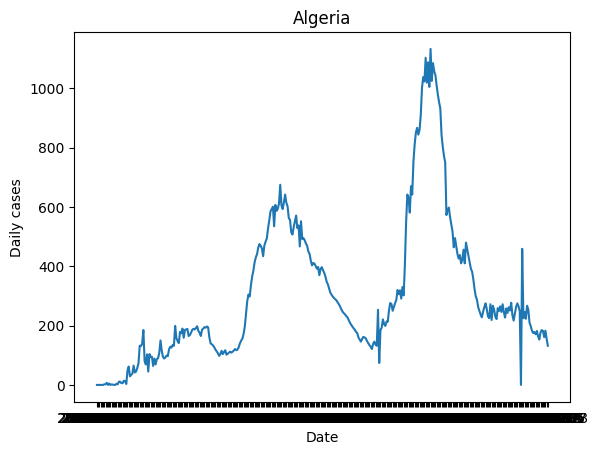

In [159]:

    country,dataframes = rnd.choice(list(data_days_stats.items()))
    sns.lineplot(data=dataframes,x=dataframes.index,y='Daily cases').set(title=country)
 

In [160]:
print(data_days_stats['Malta'].head(40))
print(data_days_stats['Malta'].tail(40))

            Daily tests  Cases  Deaths  Daily cases  Daily deaths
Date                                                             
2020-02-25         29.0    0.0     0.0          0.0           0.0
2020-02-26         50.0    0.0     0.0          0.0           0.0
2020-02-27         14.0    0.0     0.0          0.0           0.0
2020-02-28         10.0    0.0     0.0          0.0           0.0
2020-02-29          7.0    0.0     0.0          0.0           0.0
2020-03-01          8.0    0.0     0.0          0.0           0.0
2020-03-02          5.0    0.0     0.0          0.0           0.0
2020-03-03         22.0    0.0     0.0          0.0           0.0
2020-03-04         42.0    0.0     0.0          0.0           0.0
2020-03-05         31.0    0.0     0.0          0.0           0.0
2020-03-06         63.0    0.0     0.0          0.0           0.0
2020-03-07         98.0    3.0     0.0          3.0           0.0
2020-03-08        118.0    3.0     0.0          0.0           0.0
2020-03-09

In [170]:
print(data_days_stats['France'].head(50))
print(data_days_stats['France'].tail(50))

            Daily tests   Cases  Deaths  Daily cases  Daily deaths
Date                                                              
2020-01-24          0.0     2.0     0.0          0.0           0.0
2020-01-25          0.0     3.0     0.0          1.0           0.0
2020-01-26          0.0     3.0     0.0          0.0           0.0
2020-01-27          0.0     3.0     0.0          0.0           0.0
2020-01-28          0.0     4.0     0.0          1.0           0.0
2020-01-29          0.0     5.0     0.0          1.0           0.0
2020-01-30          0.0     5.0     0.0          0.0           0.0
2020-01-31          0.0     5.0     0.0          0.0           0.0
2020-02-01          0.0     6.0     0.0          1.0           0.0
2020-02-02          0.0     6.0     0.0          0.0           0.0
2020-02-03          0.0     6.0     0.0          0.0           0.0
2020-02-04          0.0     6.0     0.0          0.0           0.0
2020-02-05          0.0     6.0     0.0          0.0          

In [171]:
mean_daily_tests=[]
mean_daily_cases=[]
mean_daily_deaths=[]
for dataframes in data_days_stats.values():
    mean_daily_tests.append(dataframes["Daily tests"].mean())
    mean_daily_cases.append(dataframes['Daily cases'].loc[dataframes["Cases"]>10].mean())
    mean_daily_deaths.append(dataframes['Daily deaths'].loc[dataframes["Cases"]>10].mean())                                                         

In [175]:
countries_stats['Mean daily tests']=mean_daily_tests
countries_stats['Mean daily cases']=mean_daily_cases
countries_stats['Mean daily deaths']=mean_daily_deaths



In [177]:
countries_stats.head(10)

,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Mean daily cases,Mean daily deaths
Country,,,,,,,,,,,,,
Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,1170.264865,301.850704,5.059155
Algeria,Africa,28.03,1.66,25,1.90,1.83,3974.0,41318142,29,6,8.378378,312.395028,8.240331
Argentina,South America,-38.42,-63.62,14,5.00,3.91,9912.3,44271041,31,11,15085.977723,5886.472067,145.153631
Armenia,Europe,40.07,45.04,11,4.20,2.80,4622.7,2930450,35,11,273.035616,488.778409,9.068182
Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,16,23341.352500,73.525381,2.307107
Austria,Europe,47.52,14.55,8,7.37,5.23,50137.7,8809212,44,19,38566.581081,1258.715068,23.454795
Bahrain,Asia,25.93,50.64,27,2.00,0.92,23504.0,1492584,32,2,6934.725067,330.791892,1.213514
Bangladesh,Asia,23.68,90.36,25,0.80,0.47,1855.7,164669751,27,5,11050.571823,1569.557471,24.160920
Belarus,Europe,53.71,27.95,8,11.00,4.07,6663.3,9507875,40,15,1292.046322,811.573446,5.581921


In [179]:
countries_stats[['Mean daily tests','Mean daily cases','Mean daily deaths']]=countries_stats[['Mean daily tests','Mean daily cases','Mean daily deaths']].apply(lambda  x:round(x))

In [180]:
countries_stats.head(10)

,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Mean daily cases,Mean daily deaths
Country,,,,,,,,,,,,,
Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,1170.0,302.0,5.0
Algeria,Africa,28.03,1.66,25,1.90,1.83,3974.0,41318142,29,6,8.0,312.0,8.0
Argentina,South America,-38.42,-63.62,14,5.00,3.91,9912.3,44271041,31,11,15086.0,5886.0,145.0
Armenia,Europe,40.07,45.04,11,4.20,2.80,4622.7,2930450,35,11,273.0,489.0,9.0
Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,16,23341.0,74.0,2.0
Austria,Europe,47.52,14.55,8,7.37,5.23,50137.7,8809212,44,19,38567.0,1259.0,23.0
Bahrain,Asia,25.93,50.64,27,2.00,0.92,23504.0,1492584,32,2,6935.0,331.0,1.0
Bangladesh,Asia,23.68,90.36,25,0.80,0.47,1855.7,164669751,27,5,11051.0,1570.0,24.0
Belarus,Europe,53.71,27.95,8,11.00,4.07,6663.3,9507875,40,15,1292.0,812.0,6.0


In [185]:
pd.options.display.max_rows=105
countries_stats.sort_values(by=['Mean daily deaths'],ascending=False)

,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Mean daily cases,Mean daily deaths
Country,,,,,,,,,,,,,
United States,North America,37.09,-95.71,11,2.77,2.57,65297.5,325719178,38,16,812884.0,72974.0,1309.0
Mexico,North America,23.63,-102.55,22,1.38,2.23,9946.0,129163276,29,7,11641.0,5895.0,525.0
India,Asia,20.59,78.96,25,0.53,0.76,2099.6,1339180127,28,6,516778.0,30697.0,434.0
United Kingdom,Europe,55.38,-3.44,8,2.54,2.82,42330.1,66022273,40,18,211008.0,10824.0,318.0
Italy,Europe,41.87,12.57,14,3.18,4.02,33228.2,60551416,47,23,99299.0,7822.0,261.0
Russia,Asia,61.52,105.32,-2,8.05,3.98,11585.0,144495044,39,15,261193.0,11662.0,235.0
France,Europe,46.23,2.21,13,5.98,3.24,40493.9,67118648,42,20,128161.0,9683.0,222.0
Colombia,South America,4.57,-74.30,25,1.71,1.82,6428.7,49065615,32,8,30386.0,6379.0,169.0
Iran,Asia,32.43,53.69,20,1.50,1.49,5550.1,81162788,32,6,13559.0,4361.0,161.0


In [188]:
countries_stats["Daily tests per thousand people"]=countries_stats['Mean daily tests']/(countries_stats['Population']/1000)
countries_stats["Daily cases per thousand people"]=countries_stats['Mean daily cases']/(countries_stats['Population']/1000)
countries_stats["Daily deaths per thousand people"]=countries_stats['Mean daily deaths']/(countries_stats['Population']/1000)

In [189]:
pd.options.display.max_rows=105
countries_stats.sort_values(by=['Daily deaths per thousand people'],ascending=False)

,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Mean daily cases,Mean daily deaths,Daily tests per thousand people,Daily cases per thousand people,Daily deaths per thousand people
Country,,,,,,,,,,,,,,,,
Belgium,Europe,50.50,4.47,10,5.64,3.01,46420.7,11372068,41,19,23894.0,2125.0,61.0,2.101113,0.186861,0.005364
Slovenia,Europe,46.15,15.00,11,4.50,2.82,25946.2,2066748,44,20,4512.0,531.0,11.0,2.183140,0.256925,0.005322
United Kingdom,Europe,55.38,-3.44,8,2.54,2.82,42330.1,66022273,40,18,211008.0,10824.0,318.0,3.196012,0.163945,0.004817
Portugal,Europe,39.40,-8.22,15,3.39,4.43,23252.1,10293718,46,22,22360.0,2235.0,45.0,2.172199,0.217123,0.004372
Italy,Europe,41.87,12.57,14,3.18,4.02,33228.2,60551416,47,23,99299.0,7822.0,261.0,1.639912,0.129179,0.004310
Hungary,Europe,47.16,19.50,12,7.02,3.09,16731.8,9781127,43,19,8713.0,1207.0,42.0,0.890797,0.123401,0.004294
Panama,North America,8.54,-80.78,27,2.30,1.59,15731.0,4098587,29,8,5285.0,963.0,17.0,1.289469,0.234959,0.004148
Bulgaria,Europe,42.73,25.49,13,7.45,4.00,9828.1,7075991,44,21,3973.0,700.0,29.0,0.561476,0.098926,0.004098
Mexico,North America,23.63,-102.55,22,1.38,2.23,9946.0,129163276,29,7,11641.0,5895.0,525.0,0.090126,0.045640,0.004065


In [200]:
total_cases=[]
total_deaths=[]
for dataframe in data_days_stats.values():
    total_cases.append(dataframe.loc['2021-02-28','Cases'])
    total_deaths.append(dataframe.loc['2021-02-28','Deaths'])
countries_stats['Total cases']= total_cases  
countries_stats['Total deaths']= total_deaths  

In [204]:
countries_stats['Total cases percentage']=countries_stats['Total cases']/countries_stats['Population']*100
countries_stats['Total deaths percentage']=countries_stats['Total deaths']/countries_stats['Population']*100

In [211]:
countries_stats.sort_values(by='Total deaths percentage',ascending=False)

,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Mean daily cases,Mean daily deaths,Daily tests per thousand people,Daily cases per thousand people,Daily deaths per thousand people,Total cases,Total deaths,Total cases percentage,Total deaths percentage
Country,,,,,,,,,,,,,,,,,,,,
Belgium,Europe,50.50,4.47,10,5.64,3.01,46420.7,11372068,41,19,23894.0,2125.0,61.0,2.101113,0.186861,0.005364,771511.0,22077.0,6.784263,0.194134
United Kingdom,Europe,55.38,-3.44,8,2.54,2.82,42330.1,66022273,40,18,211008.0,10824.0,318.0,3.196012,0.163945,0.004817,4188827.0,123083.0,6.344566,0.186426
Slovenia,Europe,46.15,15.00,11,4.50,2.82,25946.2,2066748,44,20,4512.0,531.0,11.0,2.183140,0.256925,0.005322,190081.0,3836.0,9.197106,0.185606
Italy,Europe,41.87,12.57,14,3.18,4.02,33228.2,60551416,47,23,99299.0,7822.0,261.0,1.639912,0.129179,0.004310,2925265.0,97699.0,4.831043,0.161349
Portugal,Europe,39.40,-8.22,15,3.39,4.43,23252.1,10293718,46,22,22360.0,2235.0,45.0,2.172199,0.217123,0.004372,804562.0,16317.0,7.816049,0.158514
United States,North America,37.09,-95.71,11,2.77,2.57,65297.5,325719178,38,16,812884.0,72974.0,1309.0,2.495659,0.224040,0.004019,28605669.0,513091.0,8.782310,0.157526
Hungary,Europe,47.16,19.50,12,7.02,3.09,16731.8,9781127,43,19,8713.0,1207.0,42.0,0.890797,0.123401,0.004294,428599.0,14974.0,4.381898,0.153091
Bosnia and Herzegovina,Europe,43.92,17.68,12,3.50,1.89,6108.5,3507017,42,16,1232.0,370.0,14.0,0.351296,0.105503,0.003992,130979.0,5071.0,3.734769,0.144596
Bulgaria,Europe,42.73,25.49,13,7.45,4.00,9828.1,7075991,44,21,3973.0,700.0,29.0,0.561476,0.098926,0.004098,247038.0,10191.0,3.491214,0.144022


In [212]:
countries_stats.sort_values(by='Daily deaths per thousand people',ascending=False)

,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Mean daily tests,Mean daily cases,Mean daily deaths,Daily tests per thousand people,Daily cases per thousand people,Daily deaths per thousand people,Total cases,Total deaths,Total cases percentage,Total deaths percentage
Country,,,,,,,,,,,,,,,,,,,,
Belgium,Europe,50.50,4.47,10,5.64,3.01,46420.7,11372068,41,19,23894.0,2125.0,61.0,2.101113,0.186861,0.005364,771511.0,22077.0,6.784263,0.194134
Slovenia,Europe,46.15,15.00,11,4.50,2.82,25946.2,2066748,44,20,4512.0,531.0,11.0,2.183140,0.256925,0.005322,190081.0,3836.0,9.197106,0.185606
United Kingdom,Europe,55.38,-3.44,8,2.54,2.82,42330.1,66022273,40,18,211008.0,10824.0,318.0,3.196012,0.163945,0.004817,4188827.0,123083.0,6.344566,0.186426
Portugal,Europe,39.40,-8.22,15,3.39,4.43,23252.1,10293718,46,22,22360.0,2235.0,45.0,2.172199,0.217123,0.004372,804562.0,16317.0,7.816049,0.158514
Italy,Europe,41.87,12.57,14,3.18,4.02,33228.2,60551416,47,23,99299.0,7822.0,261.0,1.639912,0.129179,0.004310,2925265.0,97699.0,4.831043,0.161349
Hungary,Europe,47.16,19.50,12,7.02,3.09,16731.8,9781127,43,19,8713.0,1207.0,42.0,0.890797,0.123401,0.004294,428599.0,14974.0,4.381898,0.153091
Panama,North America,8.54,-80.78,27,2.30,1.59,15731.0,4098587,29,8,5285.0,963.0,17.0,1.289469,0.234959,0.004148,340915.0,5845.0,8.317867,0.142610
Bulgaria,Europe,42.73,25.49,13,7.45,4.00,9828.1,7075991,44,21,3973.0,700.0,29.0,0.561476,0.098926,0.004098,247038.0,10191.0,3.491214,0.144022
Mexico,North America,23.63,-102.55,22,1.38,2.23,9946.0,129163276,29,7,11641.0,5895.0,525.0,0.090126,0.045640,0.004065,2086938.0,185715.0,1.615736,0.143783
